In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
plt.style.use('fivethirtyeight')

import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")

folder = "flu/"

train_feature = pd.read_csv(folder+"training_set_features.csv")
train_label = pd.read_csv(folder+"training_set_labels.csv")
test_feature = pd.read_csv(folder+"test_set_features.csv")
train_feature.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


# Basic Information About Data

In [3]:
df = train_feature.copy()
df.shape

(26707, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
print("Percentage of missing values")
print("============================")

for var in df.columns:
    if df[var].isna().sum() >1:
        miss = np.round(df[var].isna().sum()/df.shape[0] * 100,3)
        print(var, "has {0} % of missing values".format(miss))

Percentage of missing values
h1n1_concern has 0.344 % of missing values
h1n1_knowledge has 0.434 % of missing values
behavioral_antiviral_meds has 0.266 % of missing values
behavioral_avoidance has 0.779 % of missing values
behavioral_face_mask has 0.071 % of missing values
behavioral_wash_hands has 0.157 % of missing values
behavioral_large_gatherings has 0.326 % of missing values
behavioral_outside_home has 0.307 % of missing values
behavioral_touch_face has 0.479 % of missing values
doctor_recc_h1n1 has 8.088 % of missing values
doctor_recc_seasonal has 8.088 % of missing values
chronic_med_condition has 3.636 % of missing values
child_under_6_months has 3.07 % of missing values
health_worker has 3.01 % of missing values
health_insurance has 45.958 % of missing values
opinion_h1n1_vacc_effective has 1.464 % of missing values
opinion_h1n1_risk has 1.453 % of missing values
opinion_h1n1_sick_from_vacc has 1.479 % of missing values
opinion_seas_vacc_effective has 1.73 % of missing valu

# Analysing Target Variable

In [6]:
train_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [7]:
train_label = train_label.drop("respondent_id", axis = 1)

In [8]:
Y_h1n1 =  train_label["h1n1_vaccine"]
Y_sv =  train_label["seasonal_vaccine"]

In [9]:
Y_h1n1.shape

(26707,)

In [10]:
train_label["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

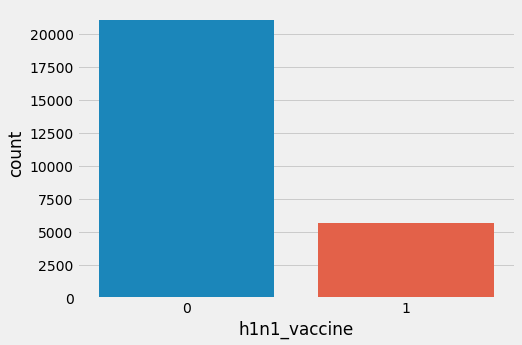

In [11]:
#For H1N1
plt.figure(figsize=(7,5))
sns.countplot(train_label["h1n1_vaccine"]);

In [12]:
train_label["seasonal_vaccine"].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

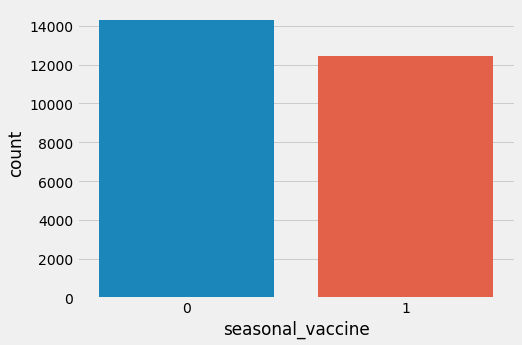

In [13]:
#For Seasonal Vaccine
plt.figure(figsize=(7,5))
sns.countplot(train_label["seasonal_vaccine"]);

# EXPLORATORY DATA ANALYSIS

In [14]:
#All the variable in the dataset is categorical
df = df.drop("respondent_id",axis = 1)

In [15]:
#dropping variables which have missing values greater than 25%

df = df.drop(["employment_industry","employment_industry","health_insurance"],axis = 1)

### Imputing Missing Values

In [16]:
test = test_feature.drop("respondent_id", axis = 1)

In [17]:
# df = pd.concat([df,test], axis = 0)

In [18]:
for var in df.columns:
        df[var] = df[var].fillna(df[var].mode()[0])
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [19]:
#Checking value counts for each variables
for var in df.columns:
    print("===============================")
    print("Value counts for {0} is \n".format(var), df[var].value_counts())

Value counts for h1n1_concern is 
 2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
Value counts for h1n1_knowledge is 
 1.0    14714
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
Value counts for behavioral_antiviral_meds is 
 0.0    25406
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
Value counts for behavioral_avoidance is 
 1.0    19436
0.0     7271
Name: behavioral_avoidance, dtype: int64
Value counts for behavioral_face_mask is 
 0.0    24866
1.0     1841
Name: behavioral_face_mask, dtype: int64
Value counts for behavioral_wash_hands is 
 1.0    22057
0.0     4650
Name: behavioral_wash_hands, dtype: int64
Value counts for behavioral_large_gatherings is 
 0.0    17160
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
Value counts for behavioral_outside_home is 
 0.0    17726
1.0     8981
Name: behavioral_outside_home, dtype: int64
Value counts for behavioral_touch_face is 
 1.0    18129
0.0     8578
Name: b

In [20]:
df.shape

(26707, 33)

In [21]:
h1n1_data = pd.concat([df,Y_h1n1],axis = 1)
h1n1_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,xtkaffoo,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,xtkaffoo,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,emcorrxb,0


#####  Level of concern about the H1N1 flu

<Figure size 1080x504 with 0 Axes>

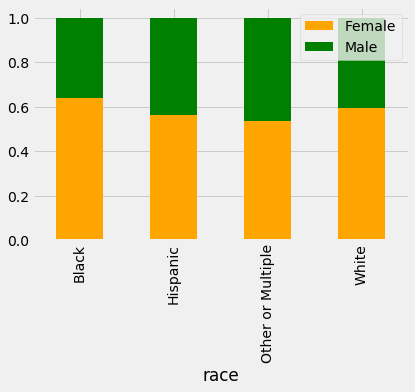

In [22]:
plt.figure(figsize=(15,7))
temp = pd.crosstab(h1n1_data["race"],h1n1_data["sex"])
temp.div(temp.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['orange', 'green'])
plt.legend()

In [23]:
temp

sex,Female,Male
race,,
Black,1356,762
Hispanic,986,769
Other or Multiple,866,746
White,12650,8572


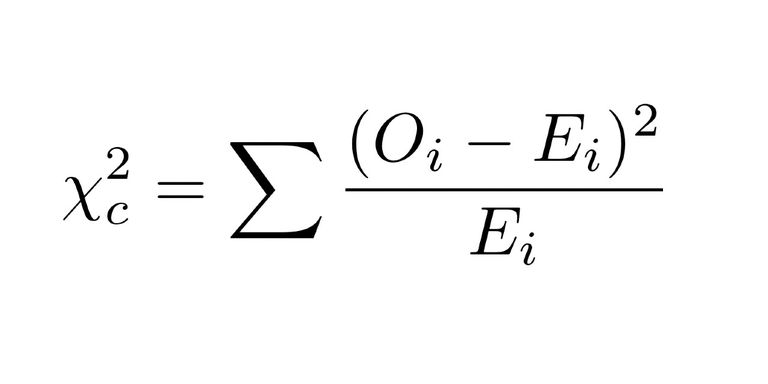

In [24]:
h1n1_data["h1n1_concern"].name, "vs",h1n1_data["h1n1_vaccine"].name

('h1n1_concern', 'vs', 'h1n1_vaccine')

In [25]:
"""fig, ax = plt.subplots(1,2,figsize=(17,7))
sns.countplot(h1n1_data["h1n1_concern"], ax=ax[0])
temp = pd.crosstab(x,y)
temp.div(temp.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['orange', 'green'], ax = ax[1])
plt.legend();"""

'fig, ax = plt.subplots(1,2,figsize=(17,7))\nsns.countplot(h1n1_data["h1n1_concern"], ax=ax[0])\ntemp = pd.crosstab(x,y)\ntemp.div(temp.sum(1).astype(float), axis = 0).plot(kind = \'bar\', stacked = True, color = [\'orange\', \'green\'], ax = ax[1])\nplt.legend();'

In [33]:
from scipy.stats import chi2_contingency,chi2

def check_cat_relation(x,y,confidence_interval):
    cross_table = pd.crosstab(x,y,margins=True)
    stat,p,dof,expected = chi2_contingency(cross_table)
    print("Chi_Square Value = {0}".format(stat))
    print("P-Value = {0}".format(p))
    alpha = 1 - confidence_interval
    
    if p > alpha:
        print(">> Accepting Null Hypothesis <<")
        print("There Is No Relationship Between Two Variables")
    else:
        print(">> Rejecting Null Hypothesis <<")
        print("There Is A Significance Relationship Between Two Variables")
        
    plt.rcParams["figure.figsize"] = 15,5
    temp = pd.crosstab(x,y)
    temp.div(temp.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
    x_label = x.name.upper()
    y_label = y.name.upper()
    plt.title("Relationship Between Two Categorical Variable")
    plt.suptitle(x_label+"   VS   "+y_label)
    plt.legend()
    plt.show();
#     return expected

Chi_Square Value = 48.21731025860194
P-Value = 8.977998587975142e-08
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


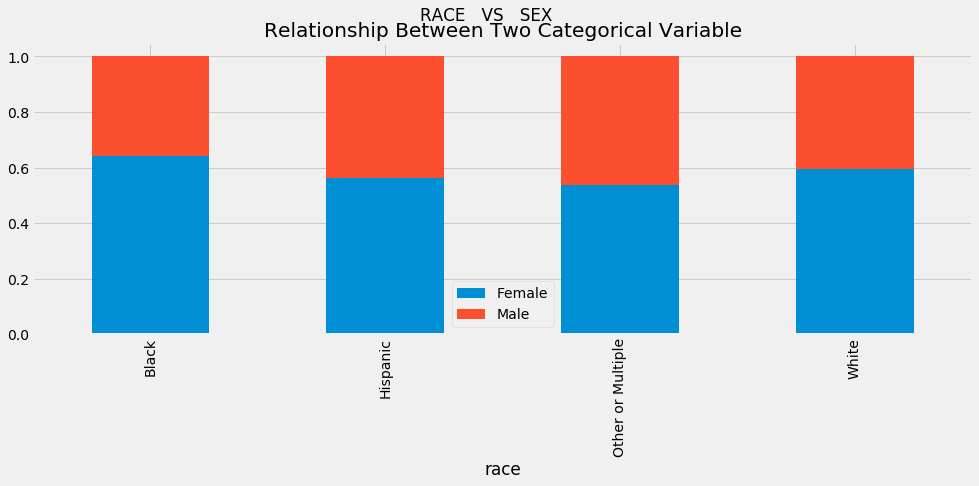

In [34]:
check_cat_relation(h1n1_data["race"],h1n1_data["sex"],0.95)

Chi_Square Value = 396.7931990299987
P-Value = 1.367313257995683e-82
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


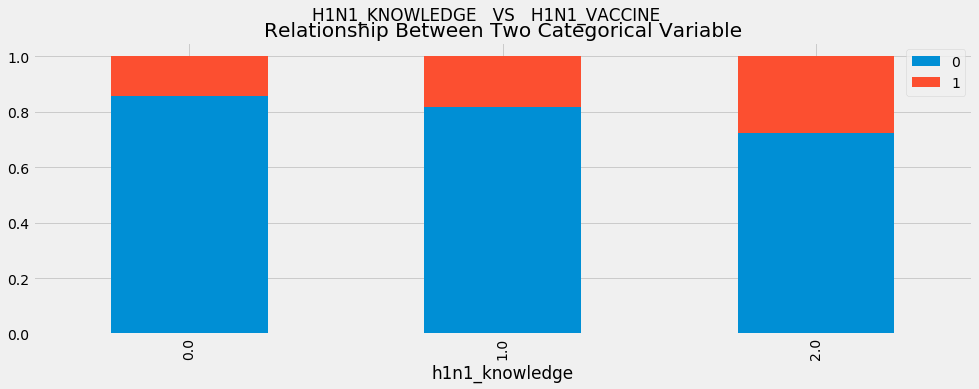

In [35]:
check_cat_relation(h1n1_data["h1n1_knowledge"],h1n1_data["h1n1_vaccine"],0.95)

In [36]:
h1n1_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,xtkaffoo,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,xtkaffoo,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,emcorrxb,0


Chi_Square Value = 47.92333409394719
P-Value = 9.79160330678401e-10
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


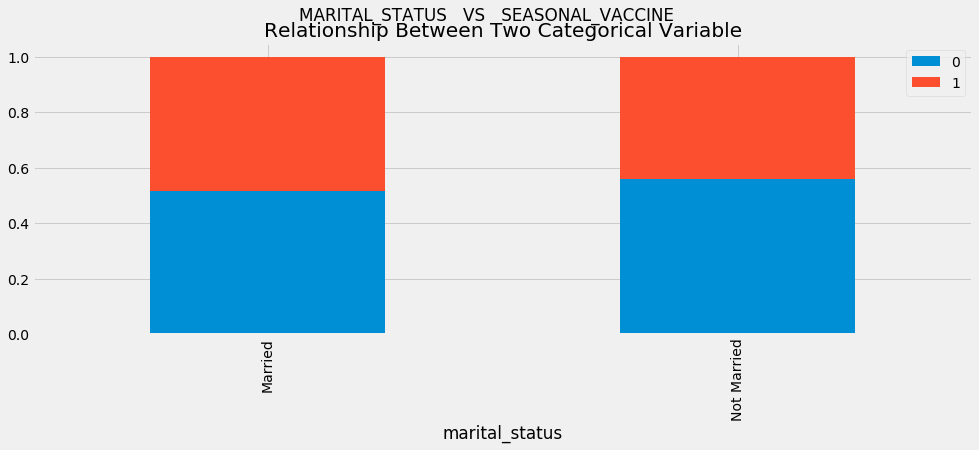

In [37]:
check_cat_relation(h1n1_data["marital_status"],Y_sv,0.95)

Chi_Square Value = 2175.6075720412746
P-Value = 0.0
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


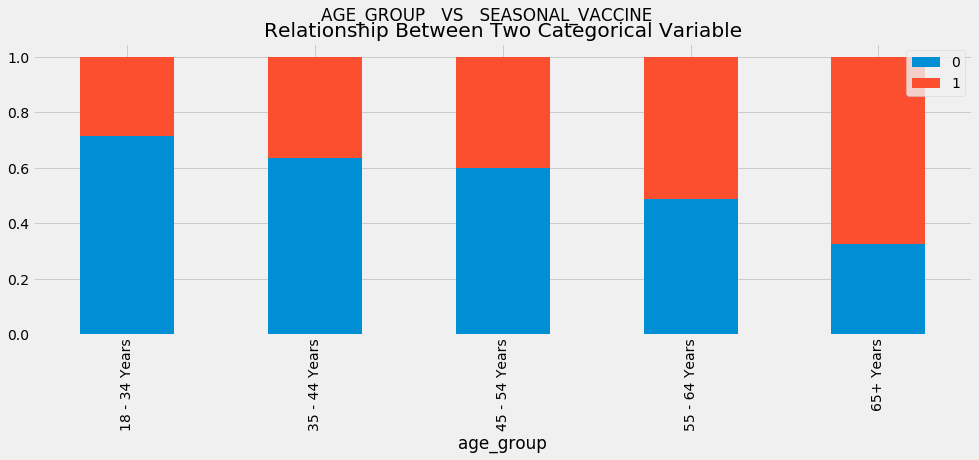

In [38]:
check_cat_relation(h1n1_data["age_group"],Y_sv,0.95)

Chi_Square Value = 142.53622474797334
P-Value = 2.92145118876112e-28
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


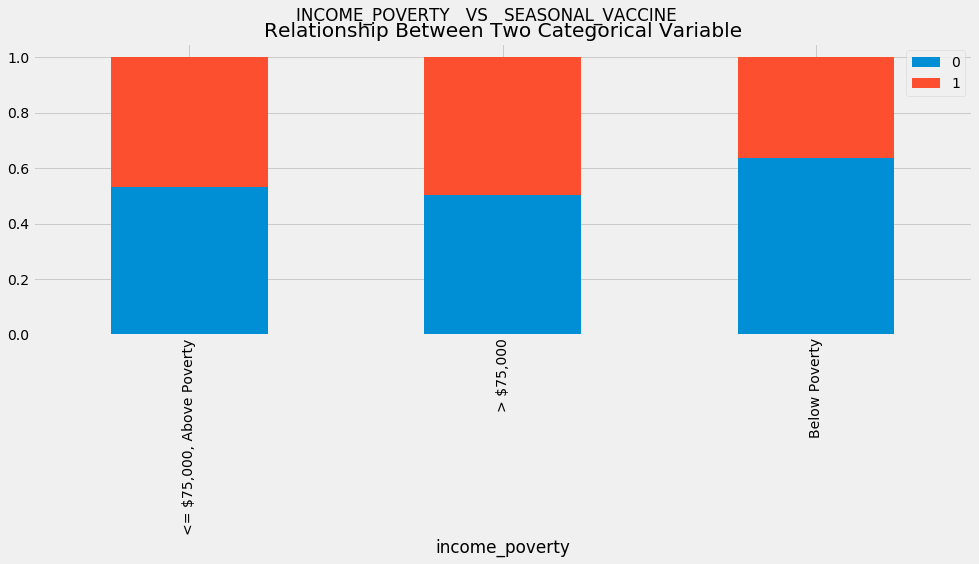

In [39]:
check_cat_relation(h1n1_data["income_poverty"],Y_sv,0.95)

Chi_Square Value = 942.2193960768177
P-Value = 1.5076433664704507e-167
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


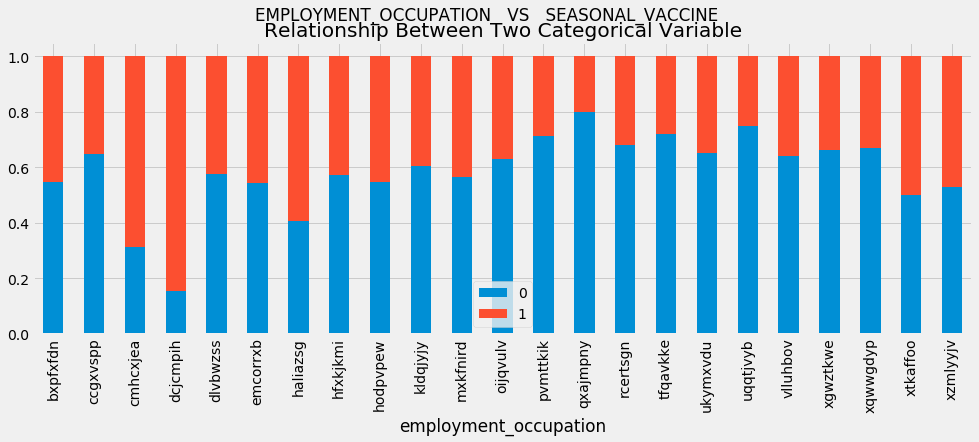

In [40]:
check_cat_relation(h1n1_data["employment_occupation"],Y_sv,0.95)

In [41]:
data = h1n1_data.drop("h1n1_vaccine",axis = 1)
dummies = pd.get_dummies(data,drop_first=True)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score,precision_score,accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

seed = 100

In [52]:
train_x,test_x,train_y,test_y = train_test_split(dummies,train_label,test_size = 0.33,stratify = train_label, random_state = 100)

In [53]:
from sklearn.multioutput import MultiOutputClassifier


model = MultiOutputClassifier(estimator=LogisticRegression(C=0.2, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=seed, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False))
model.fit(train_x,train_y)
pred = model.predict_proba(test_x)

In [54]:
pred[0], pred[1]

(array([[0.9640896 , 0.0359104 ],
        [0.87173126, 0.12826874],
        [0.77337286, 0.22662714],
        ...,
        [0.92368374, 0.07631626],
        [0.87841095, 0.12158905],
        [0.93897356, 0.06102644]]),
 array([[0.87083948, 0.12916052],
        [0.05131146, 0.94868854],
        [0.74233144, 0.25766856],
        ...,
        [0.8133421 , 0.1866579 ],
        [0.72578089, 0.27421911],
        [0.98144307, 0.01855693]]))

In [55]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred[0][:, 1],
        "seasonal_vaccine": pred[1][:, 1],
    },
    index = test_y.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
3341,0.035910,0.129161
630,0.128269,0.948689
8208,0.226627,0.257669
6526,0.167866,0.338680
26310,0.213123,0.323084


In [56]:
metrics.roc_auc_score(test_y, y_preds)

0.843557241968061

In [58]:
from lightgbm import LGBMClassifier

model = MultiOutputClassifier(estimator=LGBMClassifier(class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.05, max_depth=-1,
                                               min_child_samples=70,
                                               min_child_weight=0.001,
                                               min_split_gain=0.01,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=None, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=True,
                                               subsample=1.0,
                                               subsample_for_bin=200000,
                                               subsample_freq=0))
model.fit(train_x,train_y)
pred = model.predict_proba(test_x)
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred[0][:, 1],
        "seasonal_vaccine": pred[1][:, 1],
    },
    index = test_y.index
)
print("y_preds.shape:", y_preds.shape)

metrics.roc_auc_score(test_y, y_preds)

y_preds.shape: (8814, 2)


0.8501858695227911

In [59]:
model = MultiOutputClassifier(estimator=RandomForestClassifier())
model.fit(train_x,train_y)
pred = model.predict_proba(test_x)
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred[0][:, 1],
        "seasonal_vaccine": pred[1][:, 1],
    },
    index = test_y.index
)
print("y_preds.shape:", y_preds.shape)

metrics.roc_auc_score(test_y, y_preds)

y_preds.shape: (8814, 2)


0.83752747235153

In [60]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

dummies.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in dummies.columns.values]

# Preparing test data

In [63]:
test_feature.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [64]:
test = test_feature.drop("respondent_id", axis = 1)

In [65]:
test = test.drop(["employment_industry","employment_industry","health_insurance"],axis = 1)

In [66]:
for var in test.columns:
        test[var] = test[var].fillna(test[var].mode()[0])
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [67]:
test_dummies = pd.get_dummies(test, drop_first=True)

In [68]:
lgbm = MultiOutputClassifier(LGBMClassifier())
lgbm.fit(dummies,train_label)

MultiOutputClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=None, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=True,
                                               subsample=1.0,
                                               subsample_for_bin=200000,
                                               subsample_freq=1

In [69]:
pred_test = lgbm.predict_proba(test_dummies)

In [70]:
sub = pd.DataFrame()
sub["respondent_id"] = test_feature["respondent_id"]
sub["h1n1_vaccine"] = pred_test[0][:, 1]
sub["seasonal_vaccine"] = pred_test[1][:, 1]

In [72]:
# sub.to_csv(folder+"submission.csv",index = False)